# Exploratory Data Analysis

In [20]:
import pandas as pd
import json

# Load the JSON
with open('Dataset/Dogecoin 10 years.json', 'r') as file:
    data = json.load(file)

# Extract the 'prices' list (it's inside the first record)
# The JSON structure is [{'prices': [...], 'market_caps': [...], 'total_volumes': [...]}, ...]
# Each list contains sublists with [timestamp, value]

prices = data['prices']  # list of [timestamp, price]
market_caps = data['market_caps'] # list of [timestamp, market_cap]
volumes = data['total_volumes'] # list of [timestamp, volume]

# Convert to DataFrame
df_prices = pd.DataFrame(prices, columns=['timestamp', 'price'])
df_caps = pd.DataFrame(market_caps, columns=['timestamp', 'market_cap'])
df_volumes = pd.DataFrame(volumes, columns=['timestamp', 'volume'])

# Merge on timestamp
df = df_prices.merge(df_caps, on='timestamp').merge(df_volumes, on='timestamp')

# Convert timestamp to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Rearrange columns
df = df[['date', 'price', 'market_cap', 'volume']]

# Preview
print(df.head())


        date     price  market_cap  volume
0 2013-12-15  0.000559   3488670.0     0.0
1 2013-12-17  0.000218   1619159.0     0.0
2 2013-12-18  0.000268   2191987.0     0.0
3 2013-12-19  0.000475   4299422.0     0.0
4 2013-12-20  0.000989   9866232.0     0.0


## Explore

In [22]:
df.describe()

,date,price,market_cap,volume
count,3640,3640.000000,3.640000e+03,3.640000e+03
mean,2018-12-12 01:13:35.123363840,0.038470,5.098434e+09,5.841089e+08
min,2013-12-15 00:00:00,0.000087,1.619159e+06,0.000000e+00
25%,2016-06-14 18:00:00,0.000264,2.535183e+07,3.200607e+05
50%,2018-12-12 12:00:00,0.002551,3.077834e+08,3.618835e+07
75%,2021-06-09 06:00:00,0.061468,8.349366e+09,2.980947e+08
max,2023-12-06 00:00:00,0.681842,8.879477e+10,5.096065e+10
std,NaN,0.077159,1.013793e+10,2.483041e+09


## Change Over time

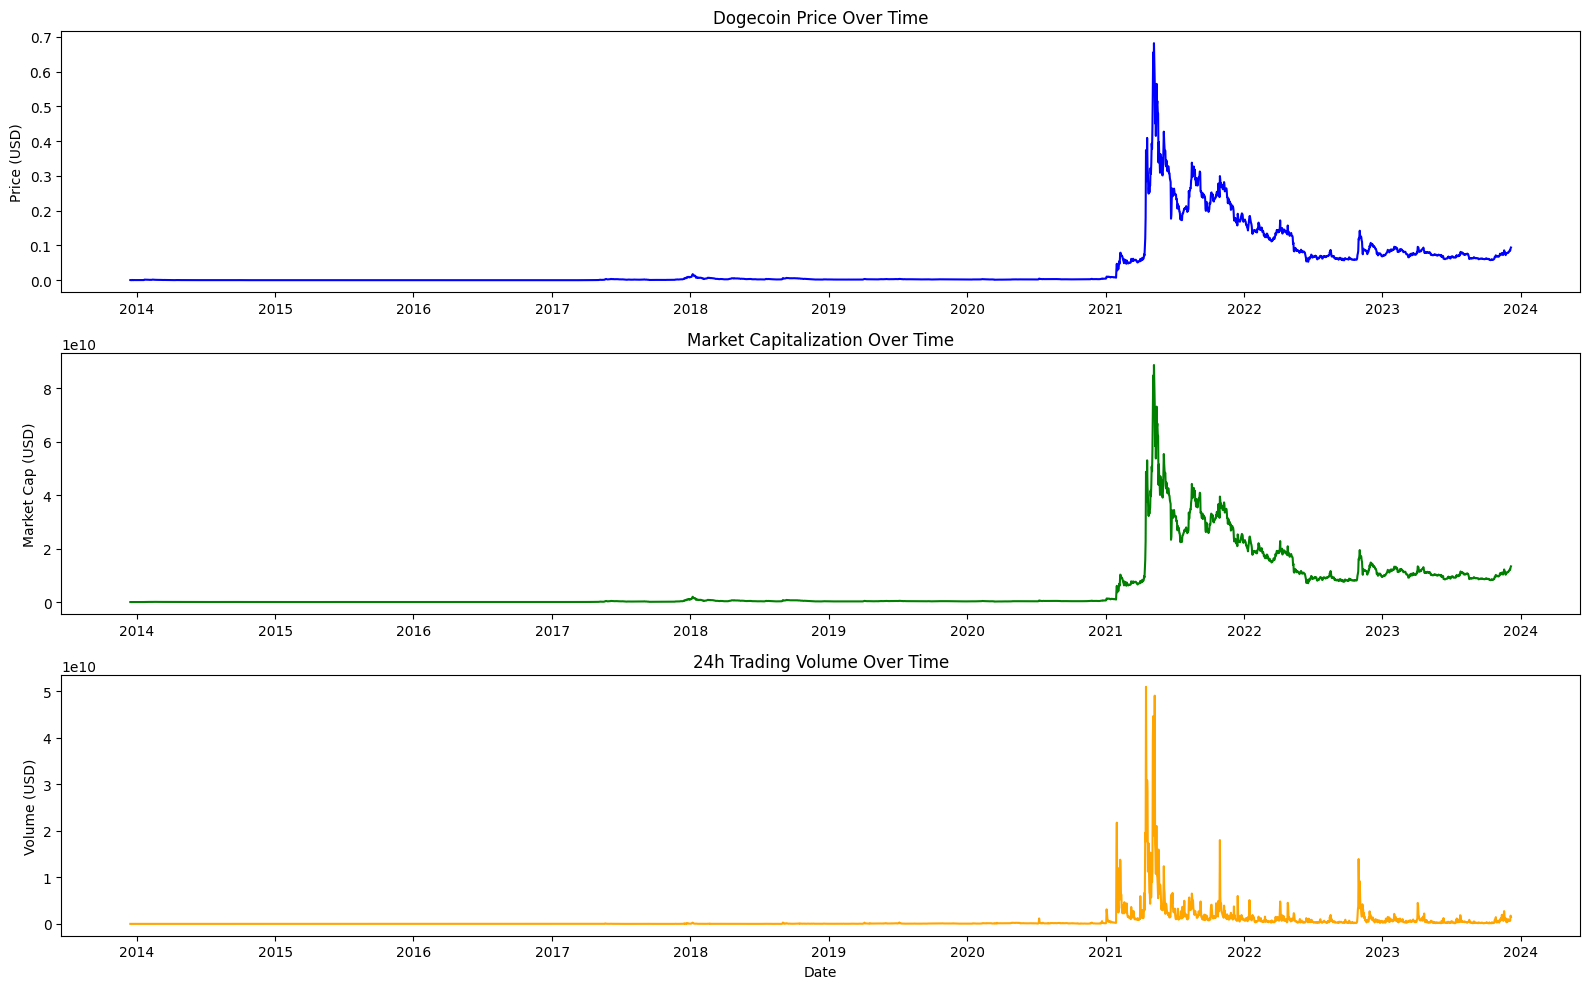

In [26]:
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(16, 10))

# Plot Price
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['price'], color='blue')
plt.title('Dogecoin Price Over Time')
plt.ylabel('Price (USD)')

# Plot Market Cap
plt.subplot(3, 1, 2)
plt.plot(df['date'], df['market_cap'], color='green')
plt.title('Market Capitalization Over Time')
plt.ylabel('Market Cap (USD)')

# Plot Volume
plt.subplot(3, 1, 3)
plt.plot(df['date'], df['volume'], color='orange')
plt.title('24h Trading Volume Over Time')
plt.ylabel('Volume (USD)')
plt.xlabel('Date')

# Layout adjustment
plt.tight_layout()
plt.show()
